<h3> Estymacja parametrów i testowanie hipotez odnośnie rozkładu

In [ ]:
options(repr.plot.width=3, repr.plot.height=3)

<h4> Metoda największej wiarygodności i metoda momentów

- metoda momentów

<h4> Zadanie1: Dane są następujące wyniki 4,2,4,5,7,2,3,5,4,2,1,5,1,4,2,2,3,5,3,0. Zakładajac, że pochodzą one z rozkładu Poissona oszacuj parametr $\lambda$ (metoda momentów).

<h4> Zadanie2: Dane są następujące wyniki 0.272,0.147,0.146,0.038,0.444,0.032,0.014,0.737,0.078,0.082,0.304,0.383,0.004,0.099,0.399, 0.434,0.07,0.006,0.173,0.408. Zakładając, że dane pochodzą z rozkładu wykładniczego oszacuj parametr $\lambda$ (metoda momentów).

- metoda największej wiarygodności

Przykład: Rzucamy 50 razy monetą. Kolejne rzuty to: O, O, R, ... , R - łącznie orzeł wypadł 30 razy, reszka 20. Jakie jest prawdopodobieństwo otrzymania takiego ciągu zdarzeń jeżeli:

a) zakładamy, że moneta którą rzucamy jest symetryczna 

b) prawdopodobieństwo orła w pojedynczym rzucie wynosi 0.4

c) prawdopodobieństwo orła w pojedynczym rzucie wynosi 0.6

d) prawdopodobieństwo orła w pojedynczym rzucie wynosi 0.7

In [40]:
(0.5)^30 * (0.5)^20

[1] 8.881784e-16

In [41]:
(0.4)^30 * (0.6)^20

[1] 4.215264e-17

In [42]:
(0.6)^30 * (0.4)^20

[1] 2.430733e-15

In [1]:
(0.7)^30 * (0.3)^20

[1] 7.858982e-16

Wniosek: Przy $p=0.6$ obserwowany ciąg zdarzeń jest najbardziej prawdopodobny.

- W R została zaimplementowana metoda najwiekszej wiarygodnosci.

In [1]:
x = c(1,1,5,5,3)
library(MASS)
fitdistr(x, "exponential")

     rate   
  0.3333333 
 (0.1490712)

<h4> Zadanie3: Poniżej wygenerowano 1000 liczb z rokładu gamma $G(k=2, \theta =3)$. Rozkład ten posiada dwa parametry: kształtu $k$ (shape) oraz skali $\theta$ (scale); czasem zamiast tego drugiego stosuje się też $r=\frac{1}{\theta}$ (rate). W przypadku rozkładu gamma $EX=k\theta$, $D^2X=k\theta^2$. 
    
- oszacuj parametry $k$ oraz $\theta$ metodą momentów i metodą największej wiarygodności. Czy otrzymano te same estymatory?
- porównaj wyestymowane parametry z teoretycznymi parametrami rozkładu.


In [8]:
set.seed(10)
x = rgamma(1000, shape = 2, scale = 3)

* W przypadku danych z rozkładu normalnego, aproksymacją $\mu$ jest średnia z danych, a dla $\sigma$ jest to odchylenie (wynika to zarówno z metody momentów jak i metody największej wiarygodności).

<h4> Metoda Bootstrap

In [ ]:
dane = rnorm(100, 5, 2) #generuje 100 liczb z rozkladu normalnego N(5,2)
print(dane[1:10])

 [1] 4.681504 5.244173 8.072208 1.656643 5.054929 6.212307 1.991581 6.846717
 [9] 6.558865 4.945263


In [ ]:
mean(dane); sd(dane)

[1] 4.834331

[1] 2.126079

In [ ]:
replikanty = lapply(1:100, function(i) sample(dane, 100, replace = T)) #generuje 100 nowych probek poprzez losowanie z powtorzeniem z pierwotnej proby
print(replikanty[[1]]) #pierwsza taka probka

  [1]  6.156537632  4.544071021  4.793677331  5.528285667  7.556935866
  [6]  2.549277391  4.474777777  5.956714737  6.492085819  3.478322383
 [11]  4.056543006 10.273475455  6.492085819  6.715712753  5.543073143
 [16]  3.892450753  4.210826452  5.956714737  5.054928721  2.619513910
 [21]  4.694001256  7.550104257  2.191292705  5.054928721  5.993044659
 [26]  3.267346646  6.104972237  0.007730757  3.214130761  1.355379087
 [31]  4.485835742  6.558864793  1.986390946  7.837430289  3.214130761
 [36]  5.012280919  4.382653507  1.500671824  6.938637152  5.845589735
 [41]  6.212306704  3.477136003  5.528285667  5.956714737  5.408924876
 [46]  4.652629956  4.050439965  4.681503914  4.924983481  6.492085819
 [51]  1.500671824  4.712804059  1.500671824  1.656643008  6.492085819
 [56]  5.543073143  2.283689336  4.837301045  2.608670979  1.355379087
 [61]  8.072207541  2.984713249  7.556935866  4.681503914  5.993044659
 [66]  4.331555693  7.837430289  8.072207541  4.050439965  0.007730757
 [71] 

In [ ]:
r.mean = sapply(replikanty, mean) #srednia dla kolejnych probek
r.sd = sapply(replikanty, sd) #odchylenie dla kolejnych probek

Jaka jest średnia?

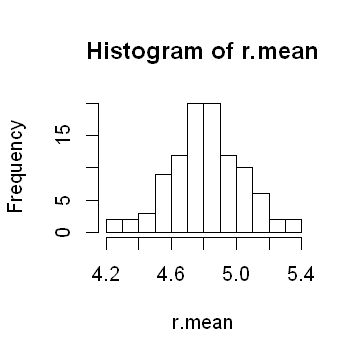

In [ ]:
hist(r.mean)

In [ ]:
mean(r.mean); sd(r.mean)

[1] 4.81391

[1] 0.2200751

In [ ]:
quantile(r.mean, c(0.025, 0.975))

2.5%    97.5% 
4.388053 5.206982

Jakie jest odchylenie?

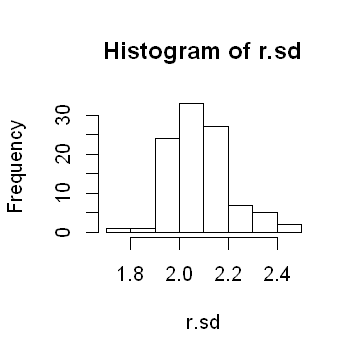

In [ ]:
hist(r.sd)

In [ ]:
mean(r.sd); sd(r.sd)

[1] 2.084667

[1] 0.1204268

In [ ]:
quantile(r.sd, c(0.05/2, 1-0.05/2))

2.5%    97.5% 
1.902563 2.340101

- Oczywiście metoda Bootstrap zostala zaimplementowana w R.

In [ ]:
library(boot)
dane2 = data.frame(x=dane)
head(dane2)

x
4.681504
5.244173
8.072208
1.656643
5.054929
6.212307


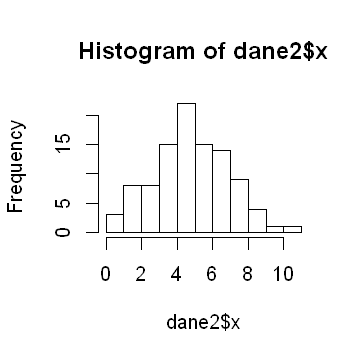

In [ ]:
hist(dane2$x)

In [ ]:
mean(dane2$x)

[1] 4.834331

In [ ]:
srednia = function(d, w) sum(d$x * w) #drugi argument to częstosci dla poszczegolnych elementow w kolejnej replikacji
wynik_boot = boot(dane2, srednia, R=999, stype="w")
quantile(wynik_boot$t, c(0.05/2, 1-0.05/2))

2.5%    97.5% 
4.402886 5.249495

<h3> Testowanie hipotez odnośnie rozkładu

<h4> Testowanie normalności

In [ ]:
#Shapiro Test - liczona jest pewna statystyka i porownywana z wartoscia teoretyczna

x = rnorm(30, 2, 1)
shapiro.test(x)


	Shapiro-Wilk normality test

data:  x
W = 0.95862, p-value = 0.2855


<h4> QQplot

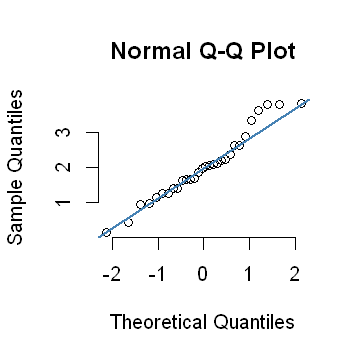

In [ ]:
#wykres typu QQ (qqplot) - wykres zaleznosci kwantyli z rozawaznego rozkladu a kwantyli rozkaldu normalnego

qqnorm(x, pch = 1, frame = FALSE) #rzeczywiste porownanie
qqline(x, col = "steelblue", lwd = 2) #jak powinno byc

<h4> Zadanie4: Wygeneruj 100 obserwacji z rozkładu jednostajnego $Unif(-2,2)$, a następnie:
    
    
    
    
    
- wykonaj test Shapiro-Wilka
- narysuj wykres typu QQplot
    
    
    
    
Skomentuj otrzymane wyniki.

<h4> Test Smirnov-Kolomogorov

In [10]:
library(ggplot2)
library(dplyr)

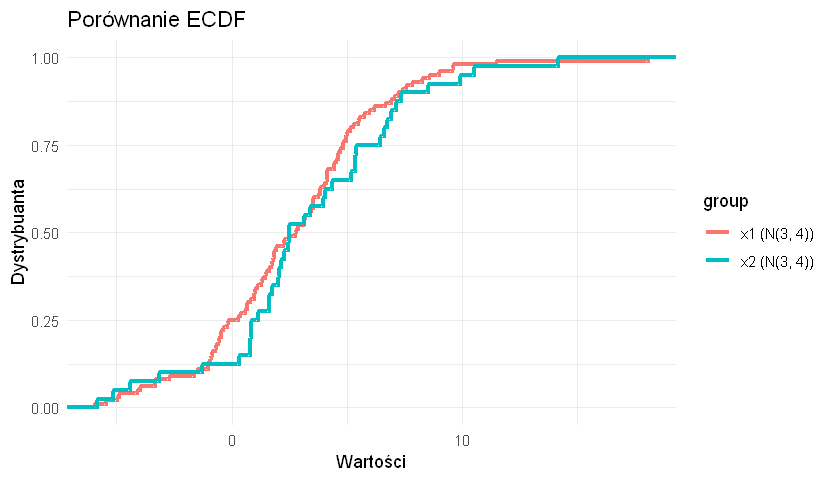

In [129]:
options(repr.plot.width=7, repr.plot.height=4)

x1 = rnorm(100, 3, 4)
x2 = rnorm(40, 3, 4)

df <- data.frame(
  value = c(x1, x2),
  group = c(rep(c("x1 (N(3, 4))"), length(x1)),rep(c("x2 (N(3, 4))"), length(x2)))
)

# Rysowanie ECDF dla obu grup
ggplot(df, aes(x = value, color = group)) +
  stat_ecdf(geom = "step", size = 1.2) +
  labs(title = "Porównanie ECDF", x = "Wartości", y = "Dystrybuanta") +
  theme_minimal()

In [11]:
#Kolmogorov-Smirnov Test - porownuje wartosci dystrybuanty #raczej dla rozkladow ciąglych
ks.test(x1,x2)


	Exact two-sample Kolmogorov-Smirnov test

data:  x1 and x2
D = 0.2, p-value = 0.1828
alternative hypothesis: two-sided


<h4> Zadanie5: Wygeneruj 200 liczb z rozkładu $N(3,1)$ oraz kolejne 200 z $Unif(2,4)$. Porównaj dystrybuanty danych i wykonaj KS test. Skomentuj otrzymane wyniki.

- Rozkład geometryczny w sekwencjach biologicznych

In [45]:
x = sample(c("A","T","G","C"), 1000, rep = T) #generuje losową sekwencje nt
t = which(x %in% c("A")) #na ktorych pozycjach są "A"
roznice_A = diff(t) 
p = 1/mean(roznice_A)

In [46]:
dane = data.frame(value = c(roznice_A,rgeom(length(roznice_A), p)+1), group = c(rep("nt",length(roznice_A)),rep("geom",length(roznice_A))))
print(head(dane))

  value group
1     3    nt
2    11    nt
3    14    nt
4     2    nt
5     1    nt
6     1    nt


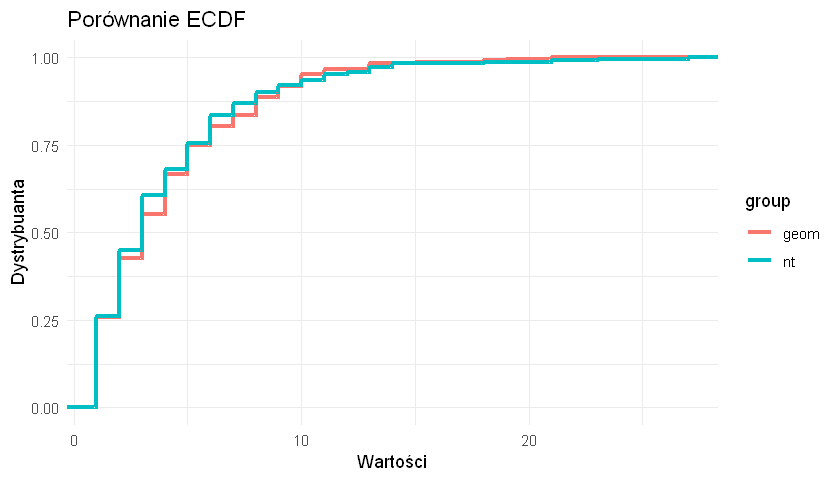

In [47]:
# Rysowanie ECDF dla obu grup
ggplot(dane, aes(x = value, color = group)) +
  stat_ecdf(geom = "step", size = 1.2) +
  labs(title = "Porównanie ECDF", x = "Wartości", y = "Dystrybuanta") +
  theme_minimal()

<h4> Zadanie6: Pobierz dane $cw4.txt$, które przedstawiają wzrost w pewnej populacji. Czy można przyjąć, że dane te pochodzą z rozkładu normalnego? Jeżeli tak, to oszacuj parametry tego rozkładu. Jakie jest prawdopdobieństwo, że wzrost przekroczy 180 w tej populacji?

<h4> Zadanie7: Rozważ dane Call-Center-Dataset.csv (rozdzielone średnikiem). Dane dotyczą interakcji klientów z agentami call center. Pozostaw kolumny: 2, 3, 4 oraz 8. Znajdują się tam kolejno: imię agenta, data połączenia, godzina rozpoczęcia rozmowy oraz czas odpowiedzi (w sekundach). Wybierz rekordy dla agenta Diane.

- narysuj histogram czasu odpowiedzi, a następnie przyjmując rozkład jednostajny oszacuj parametry  tego rozkładu jako $a=\min(X)$, $b=\max(X)$. Porównaj dane z liczbami losowymi wygenerowanymi z tego rozkładu (np. za pomocą dystrybuanty)
  
- wyznacz liczbę połączeń w kolejnych dniach, narysuj histogram, a następnie przyjmując rozkład Poissona oszacuj jego parametry. Porównaj dane z liczbami losowymi wygenerowanymi z tego rozkładu (np. za pomocą dystrybuanty)
  
- wyznacz czas pomiędzy kolejnymi godzinami rozpoczęcia rozmowy, narysuj histogram, a następnie przyjmując rozkład wykładniczy oszacuj jego parametry. Porównaj dane z liczbami losowymi wygenerowanymi z tego rozkładu (np. za pomocą dystrybuanty)

<h4> Uzupełnienie

In [18]:
t1 = as.POSIXct("09:12:58", format = "%H:%M:%S")
t2 = as.POSIXct("10:22:05", format = "%H:%M:%S")

tdiff = as.numeric(difftime(t2, t1, units = "mins"))

print(tdiff)

[1] 69.11667
